In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [277]:
data = pd.read_csv('data/energydata_complete.csv')

In [278]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


<Axes: xlabel='T2', ylabel='T6'>

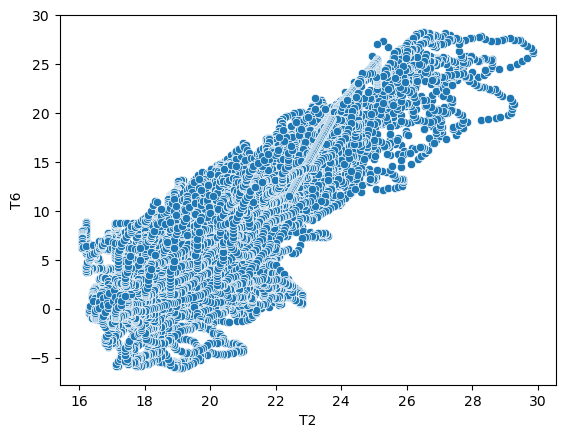

In [279]:
# Question 1

# Columns:
# T2, T6
sns.scatterplot(x='T2', y='T6', data=data)

In [280]:
model1 = LinearRegression()
model1.fit(X=data[['T2']], y=data['T6'])

LinearRegression()

In [281]:
model1.score(X=data[['T2']], y=data['T6'])

from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = np.sqrt(mean_squared_error(data['T6'], model1.predict(data[['T2']])))
round(rmse, 3)

3.644

In [282]:
# Question 2
data.drop(columns=['date', 'lights'], inplace=True)

data.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [283]:
X = data.drop(columns='Appliances')
y = data['Appliances']

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [284]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

mae_train = round(mean_absolute_error(y_train, model2.predict(X_train)), 3)
mae_train

53.742

In [285]:
rmse_train = round(np.sqrt(mean_squared_error(y_train, model2.predict(X_train))), 3)
rmse_train

95.216

In [286]:
mae_test = round(mean_absolute_error(y_test, model2.predict(X_test)),3)
mae_test


53.643

In [287]:
rmse_test = round(np.sqrt(mean_squared_error(y_test, model2.predict(X_test))),3)
rmse_test


93.64

In [288]:
# Compare train and test errors
print( round(mae_train - mae_test, 3) )
print( round(rmse_train - rmse_test, 3) )

# We conclude that the model performs well both in training and testing, and thus
# it is not overfitting.

0.099
1.576


In [289]:
# Question 3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

rmse_test_ridge = round(np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))), 3)
print(rmse_test, rmse_test_ridge)

93.64 93.641


In [293]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(X_train, y_train)
weights = pd.Series(lasso.coef_, X_train.columns).sort_values(ascending=True)
len(weights[weights != 0])

21

In [294]:
np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))

93.89249750342366